# (Non) Linear Classification
 Author: Christoph Guettner

**Abstract**  
Im Folgenden werden die Entscheidungsfunktionen von drei  
Entscheidungsalgorithmus (KNN, SVM, Tree) dargestellt.  
Es werden dafür ein linear diskriminierbarer Datensatz (Blobs)  
und ein nicht linear diskriminierbarer Datensatz (Moons)   
miteinander verglichen.


## Table of Contents
* [Loading and Preprocessing](#Loading_and_Preprocessing)
    * [Class Imports](#Class_Imports)
    * [Functions](#Functions)
    * [Explorative Data Visualisation](#Explorative_Data_Visualisation)

* [Decision Boundaries](#Decision_Boundaries)
    * [K-NN Algorithm](#KNN_Algorithm)
    * [SVM Algorithm](#SVM_Algorithm)
        * [Support Vectors](#Support_Vectors)
    * [Tree Algorithm](#Tree_Algorithm)
    

## Loading_and_Preprocessing

### Class_Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [2]:
#Functions
def load_blobs(n_samples, centers):
    X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2, \
                        random_state=0, cluster_std=3)
    return X, y

def load_moons(n_samples):
    X, y = make_moons(n_samples=n_samples, shuffle=True, noise=0.12, random_state=2)
    return X, y 

def plot_Data(Data, titel, subtitles):
    fig, axes = plt.subplots(1,2, facecolor=(.18, .31, .31), figsize=(12,5))
    fig.suptitle(titel, color='0.7')
    for i, ax in enumerate(axes.ravel()):
        ax.scatter(Data[i][0][Data[i][1]==0, 0],Data[i][0][Data[i][1]==0, 1], c='blue')
        ax.scatter(Data[i][0][Data[i][1]==1, 0],Data[i][0][Data[i][1]==1, 1], c='red')
        ax.set_title(subtitles[i], color ='orange')
        ax.set_xlabel('feature 2', color ='0.7')
        ax.set_ylabel('feature 1', color ='0.7')
        ax.legend([])
        ax.tick_params(labelcolor='tab:orange')

def get_coordinates(Data, classifier):
    XX,YY,Zs=[],[],[]
    #fit the models 
    for i in range(len(Data)):
        X_train, X_test, y_train, y_test = \
            train_test_split(Data[i][0],Data[i][1],train_size=0.8, random_state=0)
        for cl_num,clf in enumerate(classifier):
            model = clf.fit(X_train, y_train)

        # get contour varibles         
    
        x_min, x_max = Data[i][0][:,0].min()-1,Data[i][0][:,0].max()+1
        y_min, y_max = Data[i][0][:,1].min()-1,Data[i][0][:,1].max()+1

        xx,yy= np.meshgrid(np.arange(x_min,x_max,0.2), np.arange(y_min,y_max,0.2))

        # get Decision Function
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
        XX.append(xx)
        YY.append(yy)
        Zs.append(Z)
    return [XX, YY, Zs]

def plot_decision_boundaries(Data, coordinates ,titel, subtitles):
     #plot figures   
    fig, axes = plt.subplots(1,2, facecolor=(.18, .31, .31), figsize=(12,5))
    fig.suptitle(titel, color='0.7')
    
    for i, ax in enumerate(axes.ravel()):
       
        ax.scatter(Data[i][0][Data[i][1]==0, 0], Data[i][0][Data[i][1]==0, 1], c='blue')
        ax.scatter(Data[i][0][Data[i][1]==1, 0], Data[i][0][Data[i][1]==1, 1], c='red')
        ax.set_title(subtitles[i], color ='orange')
        ax.set_xlabel('feature 2', color ='0.7')
        ax.set_ylabel('feature 1', color ='0.7')
        ax.legend([])
        ax.tick_params(labelcolor='tab:orange')
        ax.contourf(coordinates[0][i],coordinates[1][i],coordinates[2][i], 15, alpha=0.4, cmap='seismic')


def get_support_vectors(Data, classifier):
    # Get support vectors
    Support_Vectors=[] 
    for i in range(len(Data)):
        X_train, X_test, y_train, y_test = train_test_split(Data[i][0],Data[i][1],train_size=0.8, random_state=0)
        for cl_num,clf in enumerate(classifier):
            model = clf.fit(X_train, y_train)
            support_vectors = model.support_vectors_
            Support_Vectors.append(support_vectors)
    return Support_Vectors



def plot_support_vectors(Data, support_vectors, titel, subtitles):
    fig, axes = plt.subplots(1,2, facecolor=(.18, .31, .31), figsize=(12,5))
    fig.suptitle(titel, color='0.7')

    for i, ax in enumerate(axes.ravel()):
        
        ax.scatter(Data[i][0][Data[i][1]==0, 0], Data[i][0][Data[i][1]==0, 1], c='blue')
        ax.scatter(Data[i][0][Data[i][1]==1, 0], Data[i][0][Data[i][1]==1, 1], c='red')
        ax.scatter(Support_Vectors[i][:,0], Support_Vectors[i][:,1], color='black')
        ax.set_title(subtitles[i], color ='orange')
        ax.set_xlabel('feature 2', color ='0.7')
        ax.set_ylabel('feature 1', color ='0.7')
        ax.legend([])
        ax.tick_params(labelcolor='tab:orange')

In [ ]:
#get Dataset
centers= [(73, 35), (85, 28)]
n_samples=150
X_1, y_1 = load_blobs(n_samples, centers)
X_2, y_2 = load_moons(n_samples)
#get lists of data and names
Data = [[X_1,y_1],[X_2,y_2]]

### Explorative_Data_Visualisation


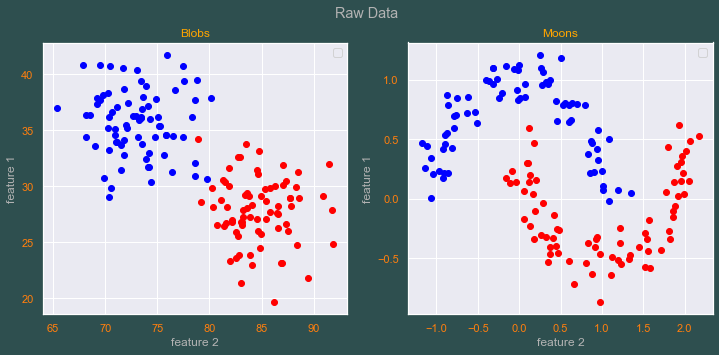

In [3]:
title='Raw Data'
subtitles=['Blobs', 'Moons']
plot_Data(Data,title, subtitles)

## Decision_Boundaries


### KNN_Algorithm

Der KNN Algorithmus nutzt die Ähnlichkeit zu den  
benachbarten Datapunkten, um die Klassenzugehörigkeit  
zu ermittel.

+ $dist(x,x') \geq max_{(x'',y'')\in S_x} dist(x,x'')$

+ $h(x) = mode({y'': (x'',y'') \in S_x})$

$S_x$ ist die Menge der relevanten Nachbarn. Um die Ähnlichkeit zu ermitteln  
wird die Minkowski Metrik mit verschiedenen p-Werten verwendet.

**Minkowski Distance**

+ $dist(x_i,x_j) = (\sum_{r=1}^{d} \|x_ir - x_jr\|^p)^\frac{1}{p}$ 

hier p = 2






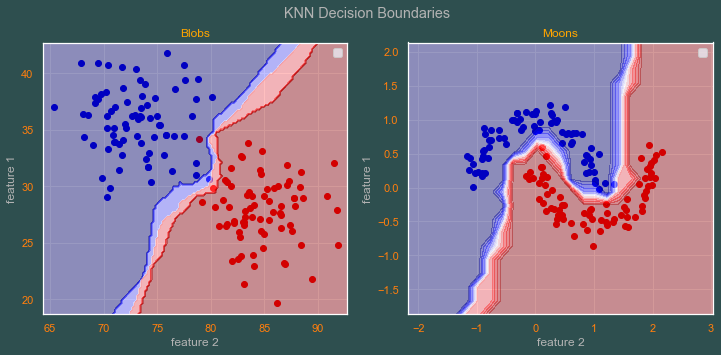

In [4]:

#get classifier
classifier=[KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)]
#get classifier name
titel='KNN Decision Boundaries'
#plot decision boundaries
coordinates = get_coordinates(Data, classifier)
plot_decision_boundaries(Data, coordinates,titel, subtitles)

### SVM_Algorithm

Die _Support Vector Machine_ maximiert den Margin zwischen   
den Datenpunkten einer Klasse und einer   
diskriminierenden Hyperebene $w \cdot x_i + b = 0$.  

**Optimierungsproblem**

$min \frac{1}{2} \|\bf{w} \|_{2}^{2}$  
s.t. $y_{i}(\bf w, x_{i} +b)\geq 1 $

Neben dem Primal Problem besteht ebenfalls die Möglichkeit das   
Optimierungsproblem in geschlossener Form darzustellen (Dual Problem).  
Die ist von Vorteil, wenn Kernelfunktionen genutzt werden sollen,   
um die Daten besser diskriminieren zu können.

**Kernel-Trick**  
Falls die Daten nicht linear unterscheidbar sind, besteht ebenfalls die  
Möglickeit den Input mittels einer geeigneten Abbildung in einen höher  
dimensionalen Hilbertraum (mit definiertem Skalarprodukt) zu transformieren.  
Die Kosten dieser Berechnung lassen sich sehr stark reduzieren, wenn eine  
positiv definite Kernelfunktion stattdessen benutzt wird (Kernel Trick):

$k( x_{i},x_{j})=\langle\phi (x_{i}),\phi (x _{j})\rangle$

Mit dem Kernel Trick gelingt es die Abbildung $\phi(x)$ zu umgehen und  
direkt die Daten mittels der Kernelfuntion zu transformieren.  
  
Hier werden nun die (nicht) linearen Datenpunkte mittels einer nicht    
linearen Kernelfunktion  (Radial-Basis Function) transformiert.  


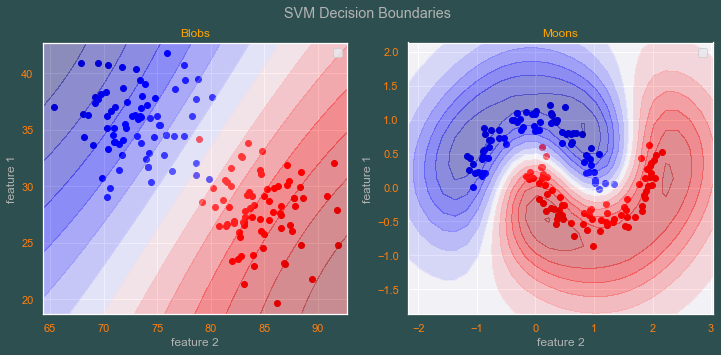

In [5]:

classifier=[SVC(kernel='rbf')]
title='SVM Decision Boundaries'
coordinates = get_coordinates(Data, classifier)
plot_decision_boundaries(Data, coordinates,title, subtitles)

#### Support Vectors

Ihren Namen hat die SVM von einer speziellen Untermenge der Trainingspunkte,  
den Support Vektoren. Falls aufgrund vom _Noise_ die Datenpunkte nicht linear  
separierbar sind, kann eine zusätzliche Schlupfvariable $\xi$ und ein  
Regulierungsparameter $C$ in das Maximierungsproblem eingeführt werden: 

$min \frac {1}{2}\|\bf {w} \|_{2}^{2}+C\sum _{i=1}^{m}\xi _{i}$

s.t. $y_{i}(\langle \bf {w \cdot x_{i}} \rangle +b)\geq 1-\xi _{i}$

 So ist es möglich, das Vektoren innerhalb der Margin liegen, und lediglich  
 die Loss Funktion etwas erhöhen. Die Support-Vektoren liegen  
 entweder auf dem Margin, falls:
 
 $y_{i}(\langle \bf {w,x} \rangle +b)=1$
 
 oder innerhalb des Margin mit $\xi _{i}>0$

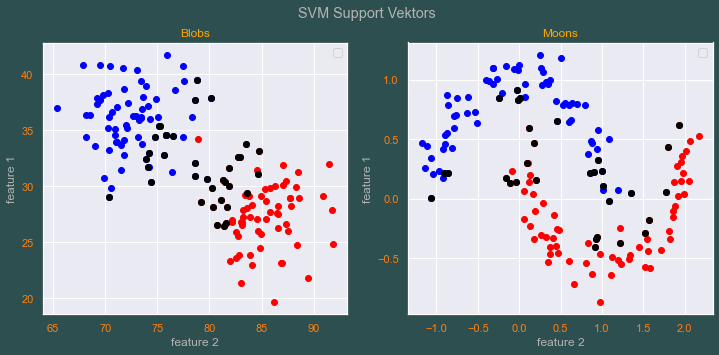

In [6]:

classifier=[SVC(kernel='rbf')]
title='SVM Support Vektors'
Support_Vectors = get_support_vectors(Data, classifier)
plot_support_vectors(Data,Support_Vectors,title, subtitles)
        
    

### Tree_Algorithm

Als Maß für die Bestimmung der besten Klassifizierung kommen Entropie-Maße, Gini-Index oder andere zur Anwendung. Das ermittelte Attribut wird nun zur Aufteilung der Daten verwendet. Auf die so entstandenen Teilmengen wird die Prozedur rekursiv angewendet, bis in jeder Teilmenge nur noch Objekte mit einer Klassifikation enthalten sind

Gini Impurity = $\sum _{i=1}^{C}p_{i}(1-p_{i})$

Enthropie = $-\sum _{i=1}^{C}p_{i}\log_{2}p_{i}$


**Information Gain**  
Für jeden weiteren Schritt ergibt sich ein Informationsgewinn, der auf die zunehmende Ordnung innerhalb der _Child Nodes_ zurückzuführen ist.

Information Gain (Enthropie): $ H(T,a) = H (T) - H(T|a) = -\sum _{i=1}^{C}p_{i}\log _{2}p_{i} - \sum _{a}p(a)\sum _{i=1}^{C}-\Pr(i|a)\log _{2} Pr(i|a)$

Die Anzahl der Splits wird durch die Tiefe des Baum (hier: max_depth= 10) extern festgelegt (Hyperparameter Tuning)


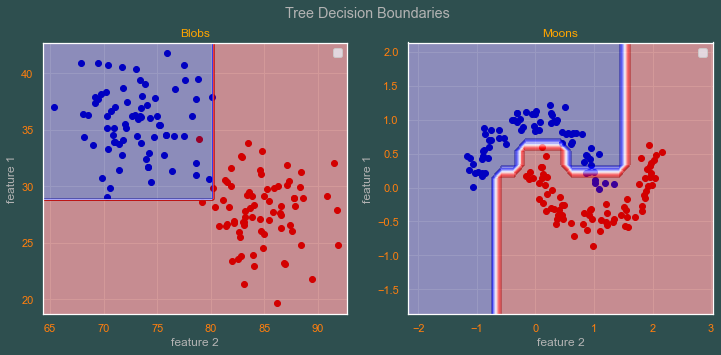

In [10]:
tree= DecisionTreeClassifier(max_depth= 10, random_state=0)
classifier=[tree]
coordinates = get_coordinates(Data, classifier)
title='Tree Decision Boundaries'
plot_decision_boundaries(Data, coordinates,title, subtitles)